# **Layer 1: Start** **bold text**

## 1. Data

1.1 Loading libraries for data creation and spliting in train-test


In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

1.2 Genearating data using make_classfication for binary classfication having four features

In [0]:
X, y = make_classification(n_samples=100, n_features=4, n_informative=3, n_redundant=1,  n_classes=2, n_clusters_per_class=1, flip_y=0.05, class_sep=0.7,shuffle=True, random_state=10)

1.3 Visualizing the generated data - two features at a time

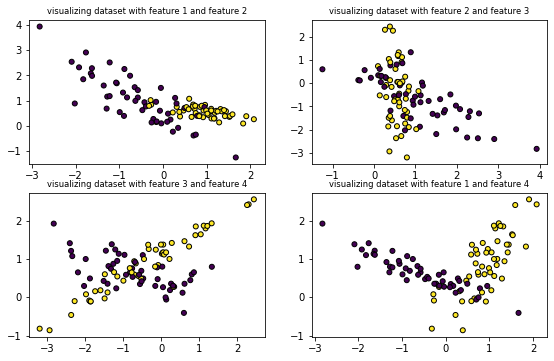

In [0]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("visualizing dataset with feature 1 and feature 2", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

plt.subplot(322)
plt.title("visualizing dataset with feature 2 and feature 3", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], marker='o', c=y,
            s=25, edgecolor='k')

plt.subplot(323)
plt.title("visualizing dataset with feature 3 and feature 4", fontsize='small')
plt.scatter(X[:, 2], X[:, 3], marker='o', c=y,
            s=25, edgecolor='k')

plt.subplot(324)
plt.title("visualizing dataset with feature 1 and feature 4", fontsize='small')
plt.scatter(X[:, 0], X[:, 3], marker='o', c=y,
            s=25, edgecolor='k')

1.4 Spliting generated data into trainset and testset with 7:3 ratio

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

1.5 Verifying the sizes of trainset and testset (no. of records and no. of features)

In [0]:
print ("Trainset - Rows x Features is", X_train.shape)

Trainset - Rows x Features is (70, 4)


In [0]:
print ("Testset Rows x Features is", X_test.shape)

Testset Rows x Features is (30, 4)


## 2. Machine Learning Model - Chosing linear SVM

2.1 Importing linear support vector machine for classfication

In [0]:
from sklearn.svm import LinearSVC

2.2 Defining SVM model - loss function, penlty term, tolerenace, regularization parameter C , and iternations

In [0]:
modelSVM = LinearSVC(random_state=10, loss='squared_hinge', C=0.01, tol=1e-4, penalty='l2', max_iter=100, dual=False)

2.3 Viewing linear SVM properties

In [0]:
vars(modelSVM) 

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 100,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 10,
 'tol': 0.0001,
 'verbose': 0}

2.4 Viewing directory strcuture of SVM model

In [0]:
dir(modelSVM)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 'class_weight',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_scaling',
 'loss',
 'max_iter',
 'multi_class',
 'penalty',
 'predict',
 'random_state',
 'score',
 'set_params',
 'sparsify',
 'tol',
 'verbose']

## 3. Training Model on Data 

3.1 Training the linear SVM model by fitting the trainset data

In [0]:
modelSVM.fit(X_train, y_train)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=10, tol=0.0001,
          verbose=0)

3.2 Viewing weights assigned to each feature and constant for decision boundary after training completion

In [0]:
 print(modelSVM.coef_, modelSVM.intercept_)


[[ 0.40129995 -0.04631236 -0.07551557  0.09072379]] [-0.00575883]


## 4. Metrics & Error Measures

4.1 Importing matplotlib for curve visualization

In [0]:
from sklearn import metrics

4.2 Visualizing ROC Curve of trained model on trainset

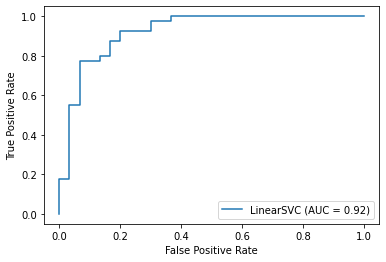

In [0]:
metrics.plot_roc_curve(modelSVM, X_train, y_train)
plt.show()


4.3 Performing predcition on trainset by trained model



In [0]:
y_train_pred = modelSVM.predict(X_train)

4.4 Calculating the accuracy on trainset

In [0]:
print("Accuracy on trainset: ",metrics.accuracy_score(y_train, y_train_pred))

Accuracy on trainset:  0.8285714285714286


4.5 Viewing confusion matirx on trainset

In [0]:
print (metrics.confusion_matrix(y_train, y_train_pred))

[[21  9]
 [ 3 37]]


4.6 Viewing precision (TP/TP+FP) and recall (TP/TP+FN) on trainset

In [0]:
print('precision on trainset: ', metrics.precision_score(y_train, y_train_pred, average='macro'))
print('recall on trainset: ', metrics.recall_score(y_train, y_train_pred, average='macro'))

precision on trainset:  0.8396739130434783
recall on trainset:  0.8125


## 5. Fine Tuning - Hyperparameters/other model

5.1 Evaluating primerly trained model on testset data

In [0]:
y_pred = modelSVM.predict(X_test)
print("Accuracy on testset: ",metrics.accuracy_score(y_test, y_pred))

Accuracy on testset:  0.7333333333333333


5.2 Performing Tuning on regularization parameter (C) by incresing the value from 0.01 to 0.10 and retrianing hte model

In [0]:
modelSVM = LinearSVC(random_state=0, loss='squared_hinge', C=0.10, tol=1e-4, penalty='l2', max_iter=100, dual=False)
modelSVM.fit(X_train, y_train)


LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

5.3 Calculating the accuracy on trainset after retraining the model

In [0]:
y_train_pred = modelSVM.predict(X_train)
print("Accuracy on traindata (after fine-tuning): ",metrics.accuracy_score(y_train, y_train_pred))

Accuracy on traindata (after fine-tuning):  0.8857142857142857


5.4 Evaluating accuracy on testdata after retraining the model

In [0]:
y_pred = modelSVM.predict(X_test)
print("Accuracy on testdata (after fine-tuning): ",metrics.accuracy_score(y_test, y_pred))

Accuracy on testdata (after fine-tuning):  0.8666666666666667


5.5 [Optional] Understanding the impact of penalties by changing the penalty from L2 (squared) to L1 (absolute)

In [0]:
modelSVM = LinearSVC(random_state=0, loss='squared_hinge', C=0.05, tol=1e-4, penalty='l1', max_iter=500, dual=False)
modelSVM.fit(X_train, y_train)
print(modelSVM.coef_, modelSVM.intercept_)


[[ 0.56368795  0.         -0.01966063  0.        ]] [0.]


5.6 [Optional] Exploring and training nonlinear SVM

In [0]:
from sklearn.svm import SVC
modelNonLinearSVM = SVC(gamma='auto')
modelNonLinearSVM.fit(X_train, y_train)
yy_pred = modelNonLinearSVM.predict(X_test)
print("Accuracy on testdata (after fine-tuning): ",metrics.accuracy_score(y_test, yy_pred))

Accuracy on testdata (after fine-tuning):  0.9333333333333333


## 6 Prediction

6.1 Visualizing ROC Curve (Area under curve) on testset

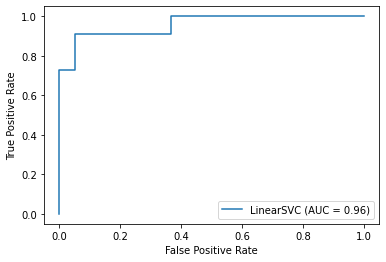

In [0]:
metrics.plot_roc_curve(modelSVM, X_test, y_test)
plt.show()


6.2 Viewing confusion matrix on test set

In [0]:
print (metrics.confusion_matrix(y_test, y_pred))

[[16  3]
 [ 1 10]]


6.3 Evalauting Accuracy, Precision (TP/TP+FP), and recall (TP/TP+FN) on testset after fine-tuning

In [0]:
print('Accuracy on testset: ', metrics.accuracy_score(y_test, y_pred))
print('precision on testset: ', metrics.precision_score(y_test, y_pred, average='macro'))
print('recall on testset: ', metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy on testset:  0.8666666666666667
precision on testset:  0.8552036199095023
recall on testset:  0.8755980861244019


# **Layer 1: End**